In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



In [3]:
X = np.array([[5, 10, 30, 1]]) 
y = np.array([20])
BMI = X[:, 1] / (X[:, 0] ** 2)  
X_with_BMI = np.hstack((X, BMI.reshape(-1, 1)))

In [5]:
def create_model(input_dim):
    model = keras.Sequential([
        layers.Dense(2, activation='relu', input_shape=(input_dim,)),
        layers.Dense(1) 
    ])
    return model

In [19]:
def compile_and_train(X_train, y_train, epochs=10):
    model = create_model(X_train.shape[1])
    model.compile(optimizer='rmsprop', loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return history
history_no_BMI = compile_and_train(X, y)
history_with_BMI = compile_and_train(X_with_BMI, y)


In [21]:
def plot_loss_curve(history, label):
    plt.plot(history.history['loss'], label=label)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

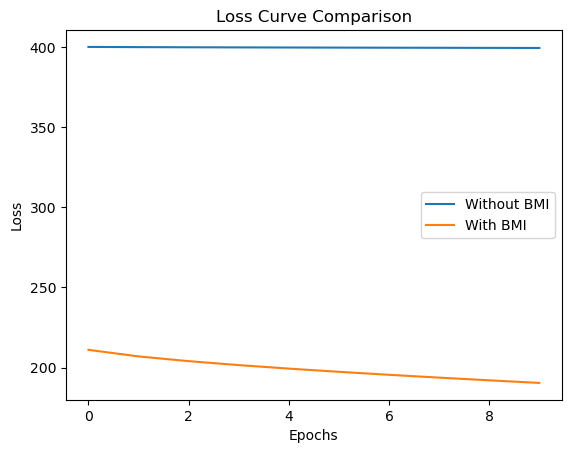

In [23]:
plt.figure()
plot_loss_curve(history_no_BMI, 'Without BMI')
plot_loss_curve(history_with_BMI, 'With BMI')
plt.title('Loss Curve Comparison')
plt.show()